In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot')

In [34]:
cols = ['DayofMonth','Flight_Number_Reporting_Airline','DepDelayMinutes','ArrDelayMinutes']
airlines = pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_2019_1.csv',usecols=cols)
airlines.head(10)

,DayofMonth,Flight_Number_Reporting_Airline,DepDelayMinutes,ArrDelayMinutes
0,4,5657,0.0,0.0
1,4,5658,0.0,1.0
2,4,5658,0.0,0.0
3,4,5659,0.0,0.0
4,4,5660,0.0,0.0
5,4,5661,0.0,0.0
6,4,5664,0.0,3.0
7,4,5665,8.0,0.0
8,4,5667,0.0,0.0
9,4,5668,0.0,1.0


In [35]:
print(f"Number of observations in January 2019: {airlines.shape[0]}")    

Number of observations in January 2019: 583985


In [36]:
def get_info(pd_frame):
    res = pd_frame.describe().transpose()
    res['missing_percent'] = [(pd_frame.shape[0] - res.loc[ind, 'count'])/pd_frame.shape[0] for ind in res.index]
    res['unique_val'] = [len(pd_frame.loc[:,ind].value_counts()) for ind in res.index]
    res['var_type'] = ['Continuous' if res.loc[ind, 'unique_val'] >=100 else 'Categorical' for ind in res.index]
    return res

In [37]:
info = get_info(airlines)
info

,count,mean,std,min,25%,50%,75%,max,missing_percent,unique_val,var_type
DayofMonth,583985.0,15.960088,8.987942,1.0,8.0,16.0,24.0,31.0,0.000000,31,Categorical
Flight_Number_Reporting_Airline,583985.0,2537.869334,1821.736145,1.0,979.0,2114.0,3902.0,7439.0,0.000000,6839,Continuous
DepDelayMinutes,567630.0,13.258226,47.507390,0.0,0.0,0.0,5.0,1651.0,0.028006,960,Continuous
ArrDelayMinutes,565963.0,13.654539,47.488893,0.0,0.0,0.0,7.0,1638.0,0.030860,951,Continuous


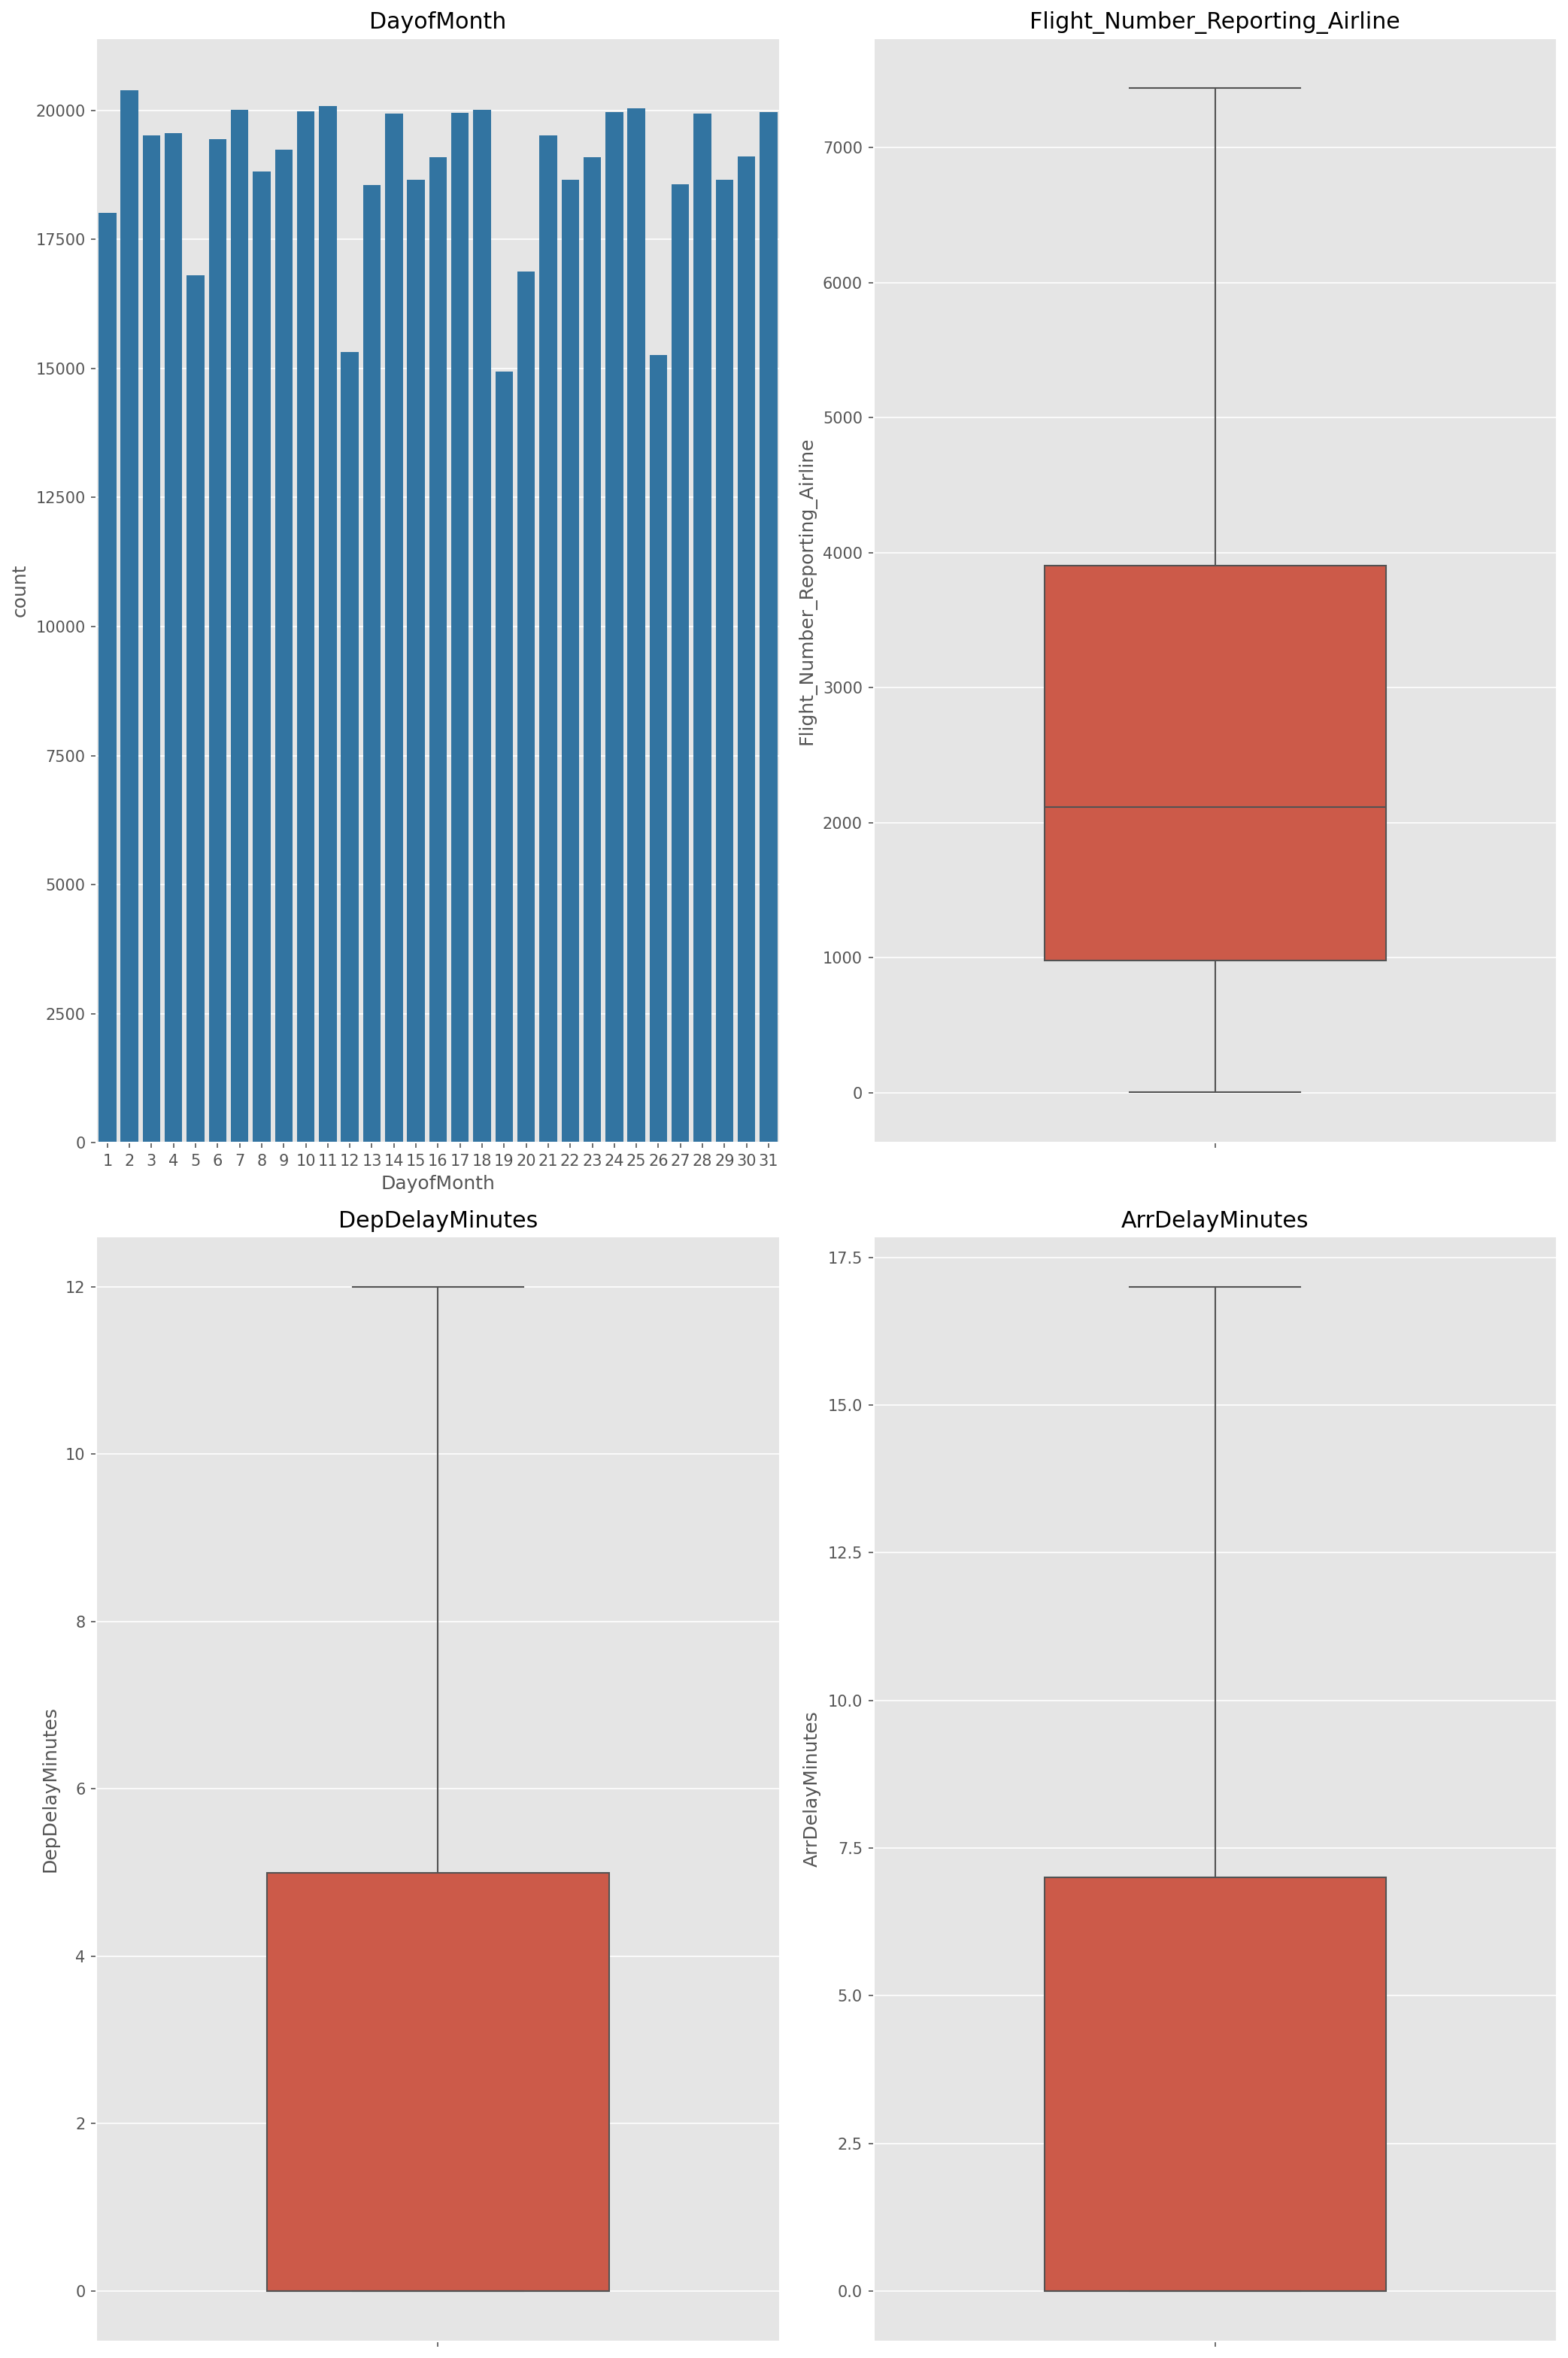

In [38]:
fig,axs = plt.subplots(2,2,figsize=(14,21))

for i,ind in enumerate(info.index):
    if info.loc[ind, 'var_type'] == 'Continuous':
        sns.boxplot(airlines,y=ind,ax=axs[i//2, i%2],width=0.5,showfliers=False)
    else:
        sns.countplot(data=airlines,x=ind,color='#1f77b4',ax=axs[i//4, i%4])
    axs[i//2, i%2].set_title(ind)
fig.tight_layout()

Most delays are under five minutes, but delays tend to be skewed upwards. There are also noticeably less flights on the Saturday of each week. The graphs for arrival and departure delay look the same.

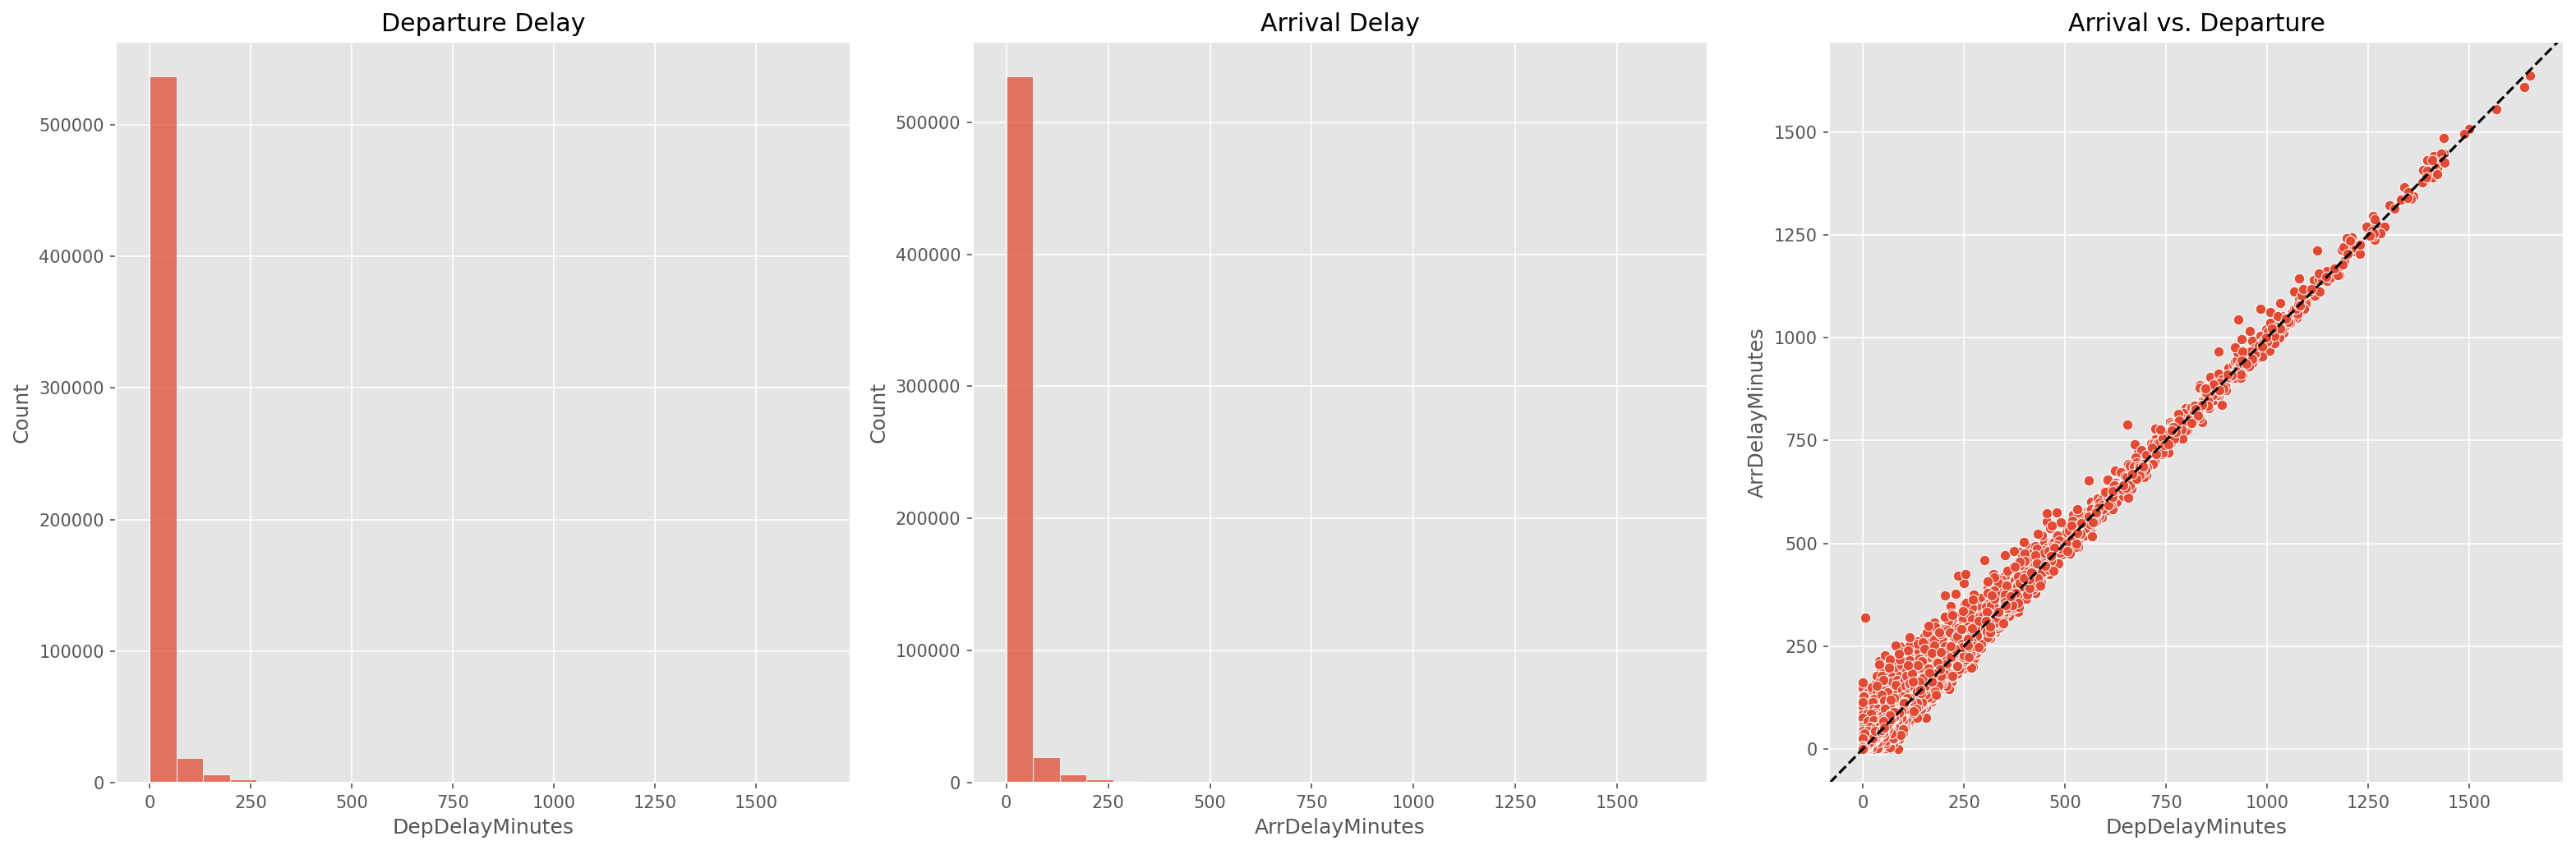

In [47]:
fig,axs = plt.subplots(1,3,figsize=(21,7))
_ = sns.histplot(airlines,x='DepDelayMinutes',ax=axs[0],bins=25)
_ = axs[0].set_title('Departure Delay')

_ = sns.histplot(airlines,x='ArrDelayMinutes',ax=axs[1],bins = 25)
_ = axs[1].set_title('Arrival Delay')

_ = sns.scatterplot(airlines,x='DepDelayMinutes',y='ArrDelayMinutes',ax=axs[2])
_ = axs[2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[2].set_title('Arrival vs. Departure')

fig.tight_layout()

Arrival and departure delay are positively correlated, which makes sense since departure delay directly influences arrival delay.

In [49]:
# filter for delays longer than one hour
higherdelays = airlines[airlines['ArrDelayMinutes'] > 60]
more_info = get_info(higherdelays)

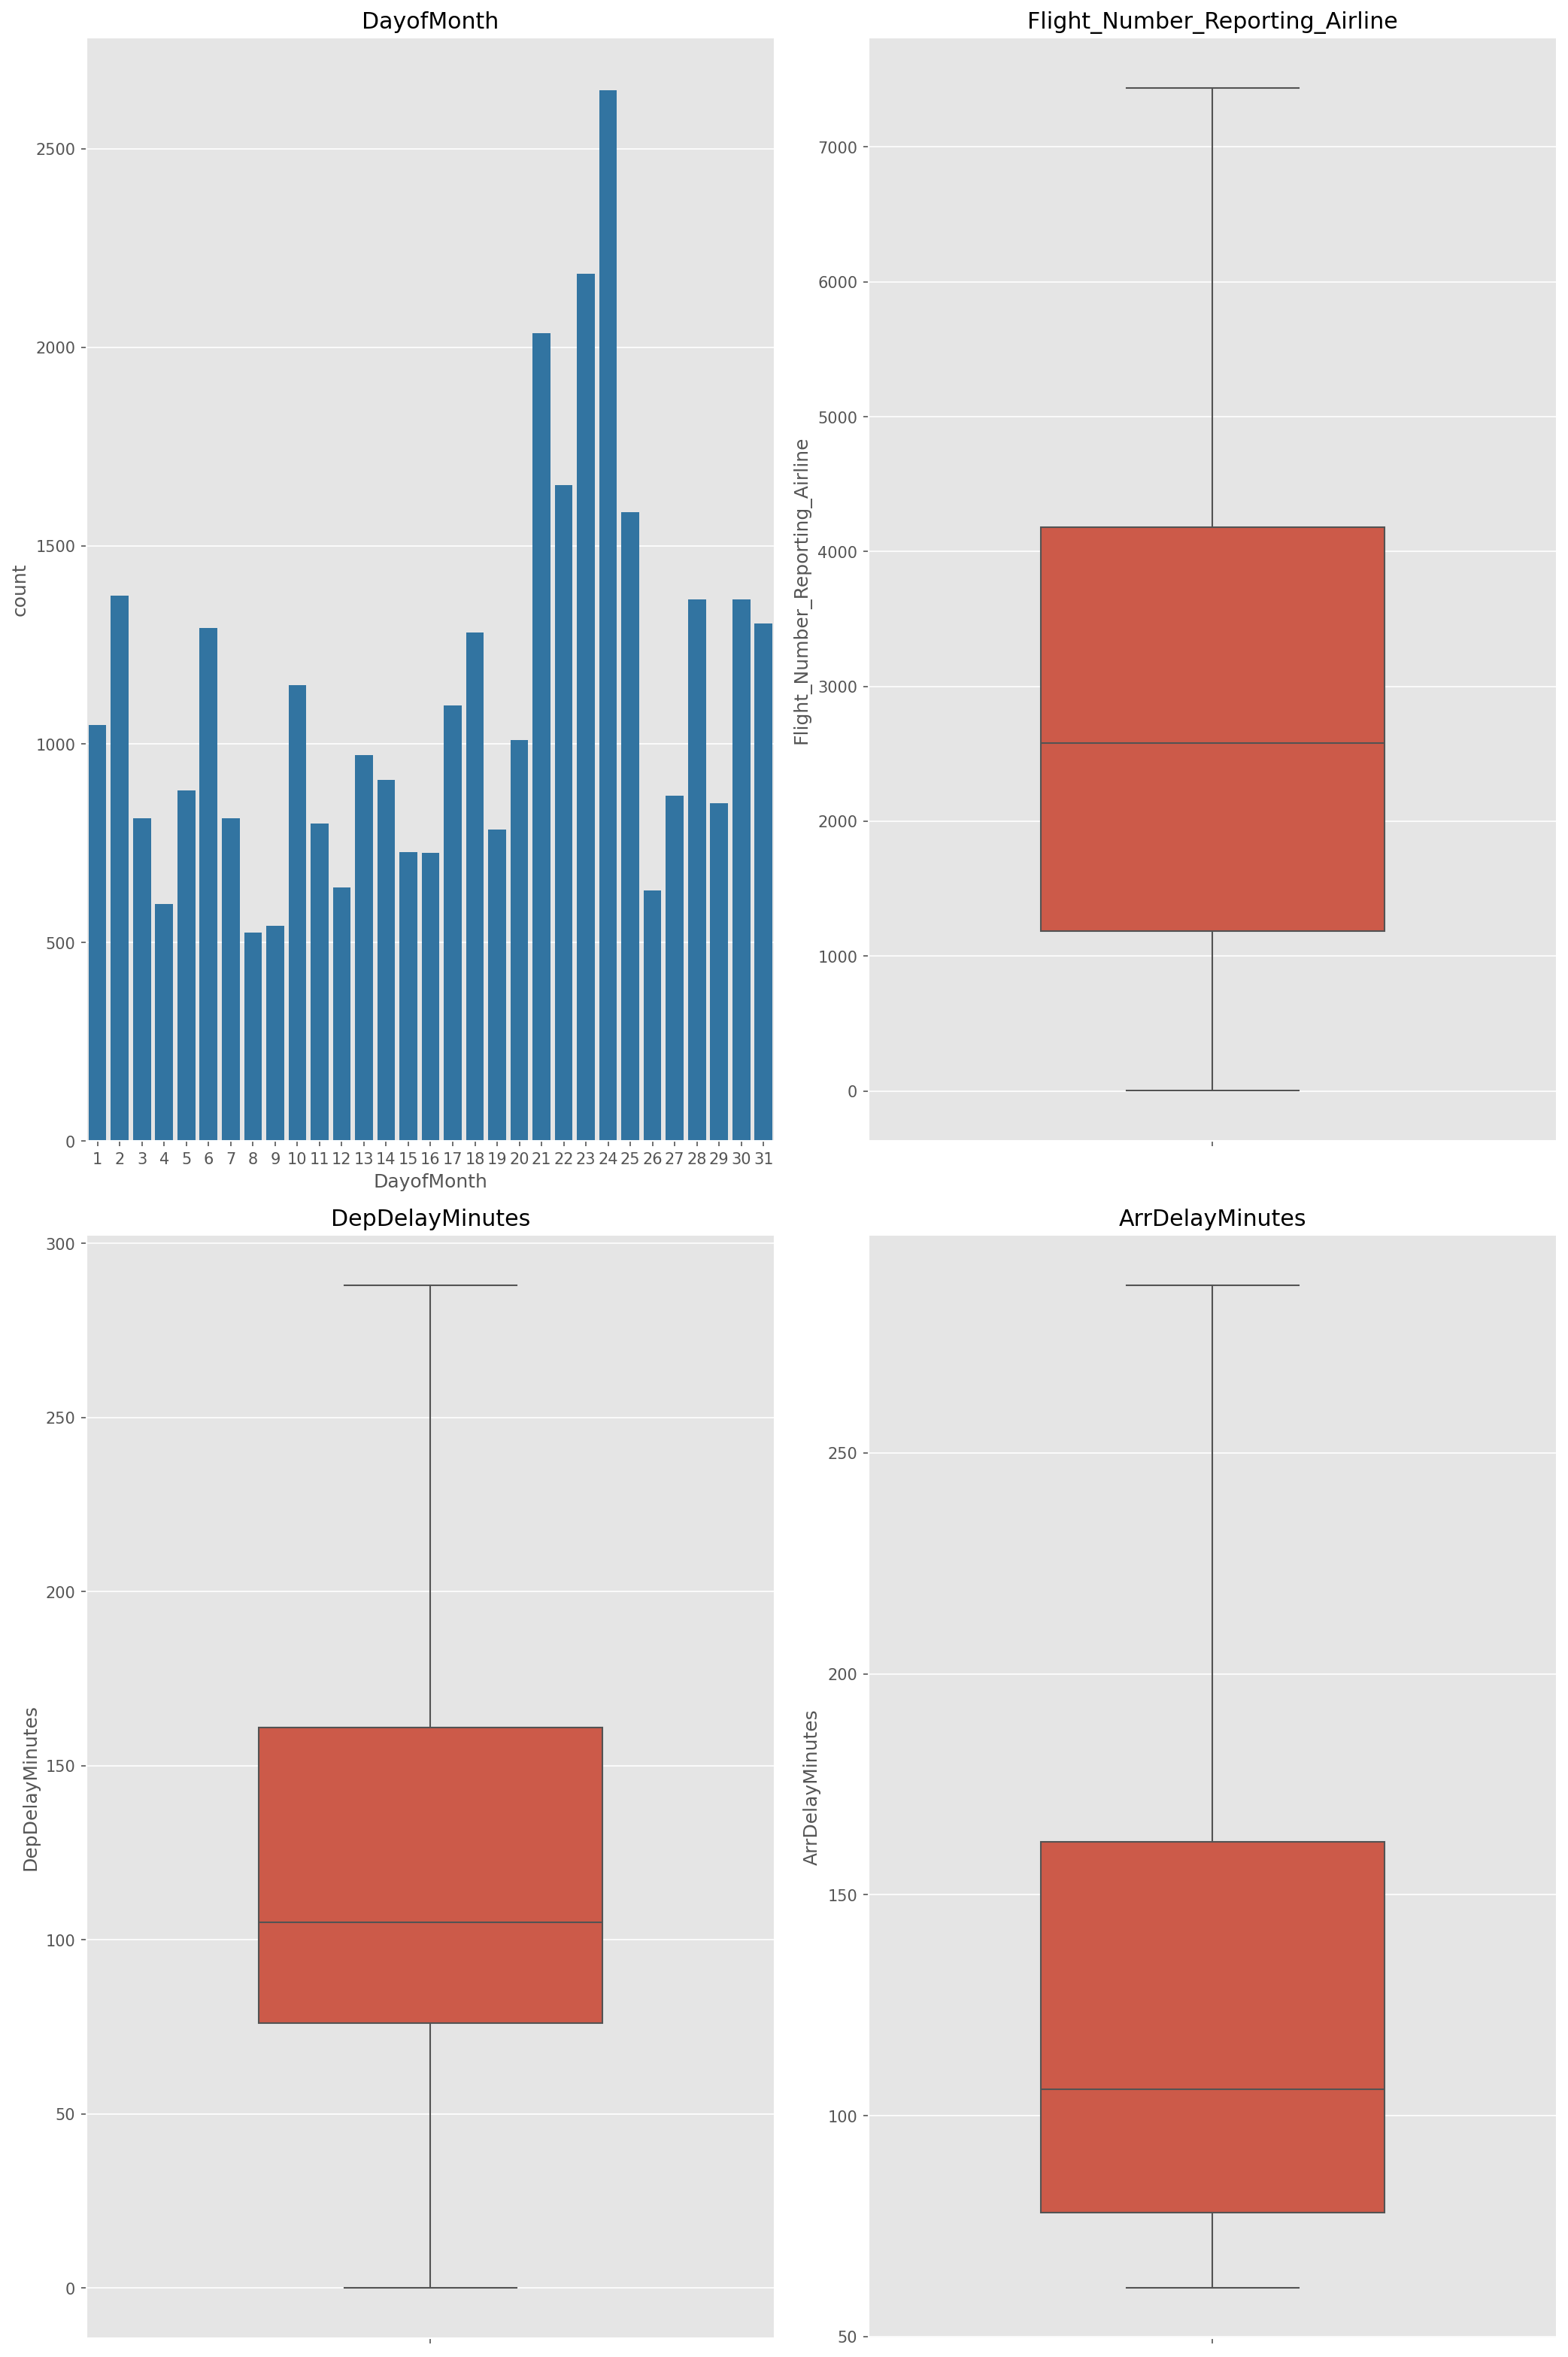

In [50]:
fig,axs = plt.subplots(2,2,figsize=(14,21))

for i,ind in enumerate(more_info.index):
    if more_info.loc[ind, 'var_type'] == 'Continuous':
        sns.boxplot(higherdelays,y=ind,ax=axs[i//2, i%2],width=0.5,showfliers=False)
    else:
        sns.countplot(data=higherdelays,x=ind,color='#1f77b4',ax=axs[i//4, i%4])
    axs[i//2, i%2].set_title(ind)
fig.tight_layout()

There seems to be a significant number of extreme delays on the 24th. For delays longer than one hour, departure delay seems to be longer than arrival delays.

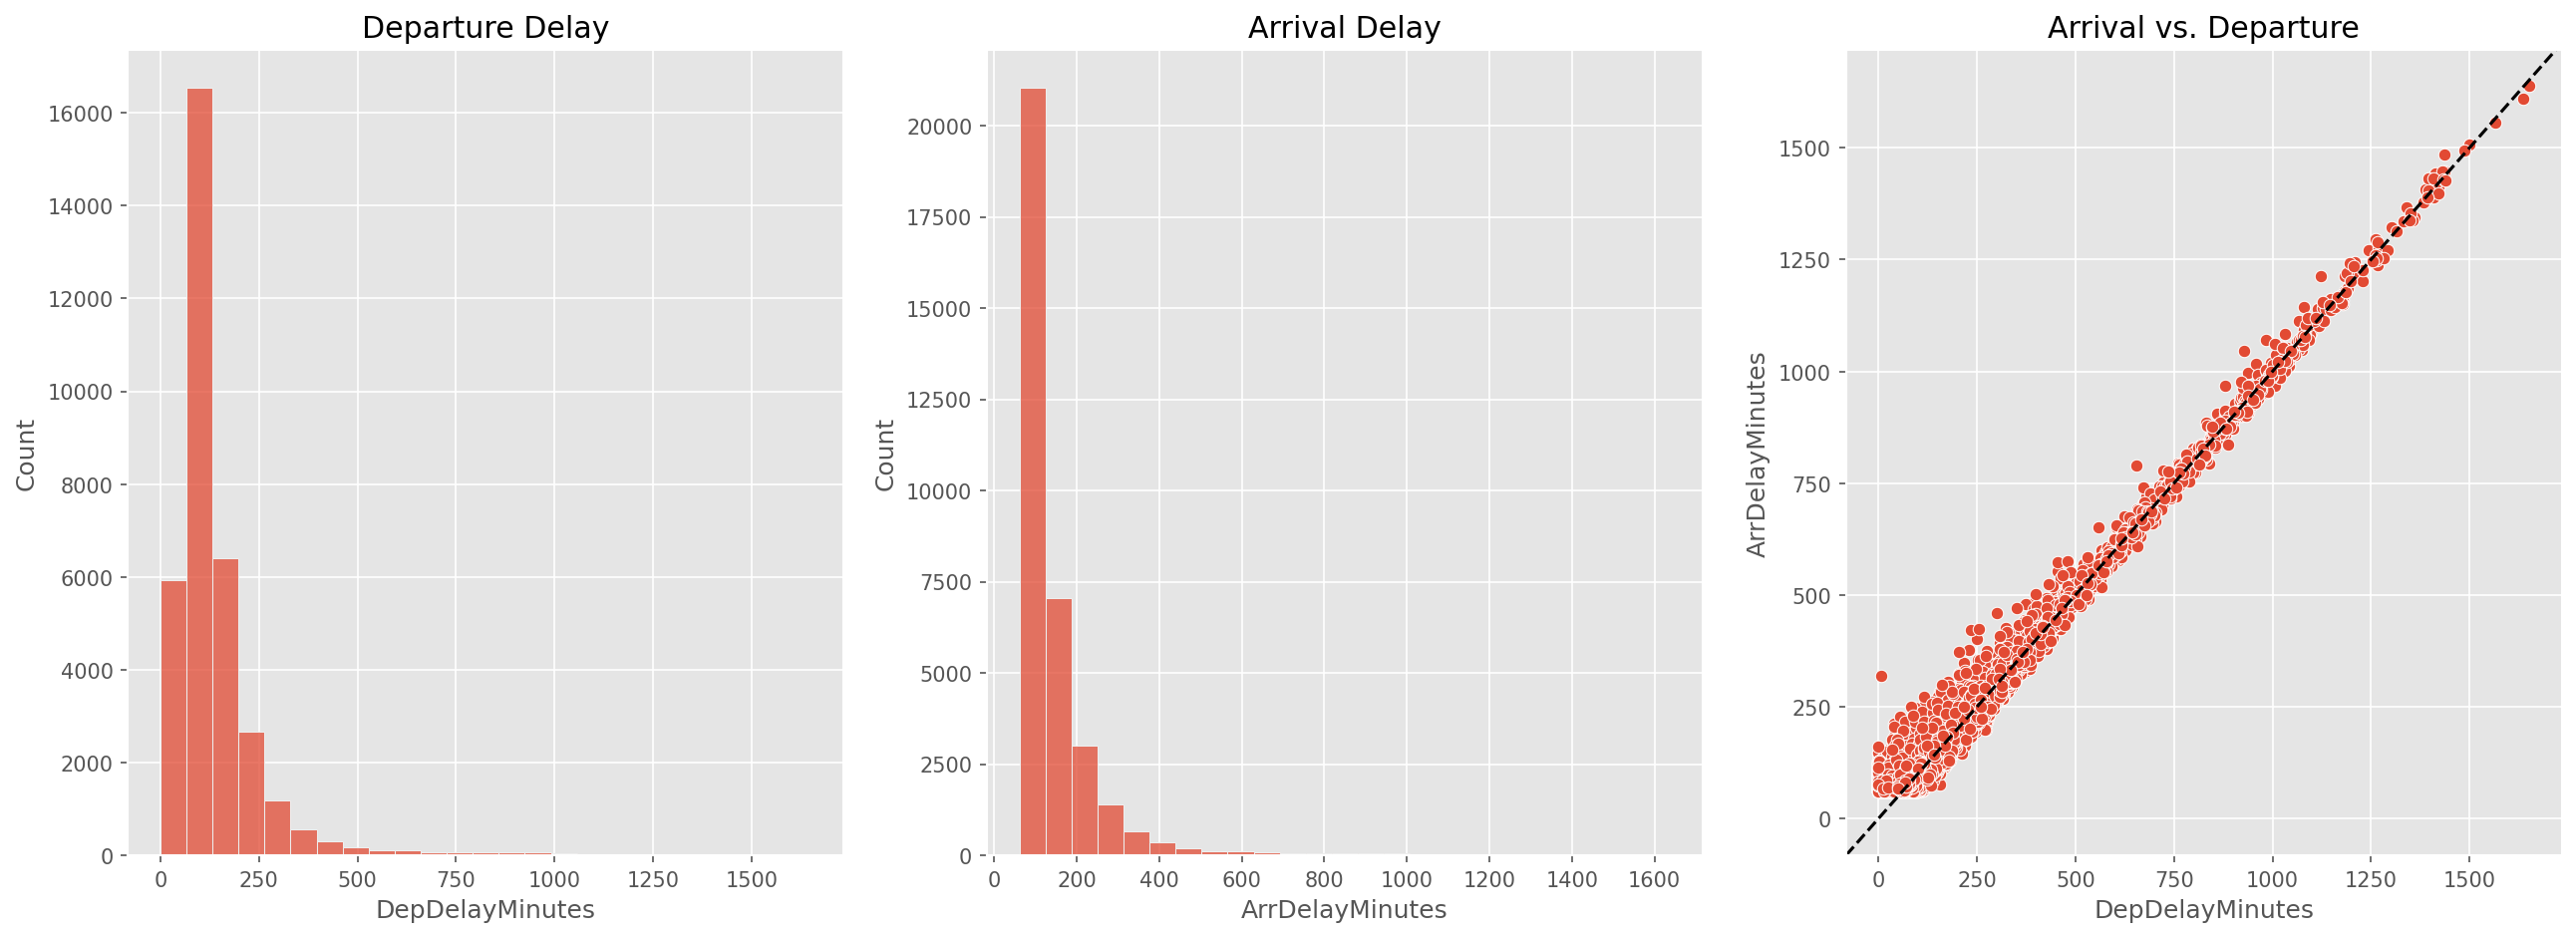

In [51]:
fig,axs = plt.subplots(1,3,figsize=(21,7))
_ = sns.histplot(higherdelays,x='DepDelayMinutes',ax=axs[0],bins=25)
_ = axs[0].set_title('Departure Delay')

_ = sns.histplot(higherdelays,x='ArrDelayMinutes',ax=axs[1],bins = 25)
_ = axs[1].set_title('Arrival Delay')

_ = sns.scatterplot(higherdelays,x='DepDelayMinutes',y='ArrDelayMinutes',ax=axs[2])
_ = axs[2].axline((0, 0), slope=1,color='black',linestyle='dashed')
_ = axs[2].set_title('Arrival vs. Departure')

The graphs show similar patterns to before when all the data was included. Because this is only a subset of the higher end of the data, it looks a little less skewed but still has skew to the right. 